#Introduction

Decision trees are known in the machine learning world for a particularly distinctive characteristic: their visualizations are easier to understand compared to other machine learning models, and for this reason, they are very suitable for explaining insights to non-technical audiences.

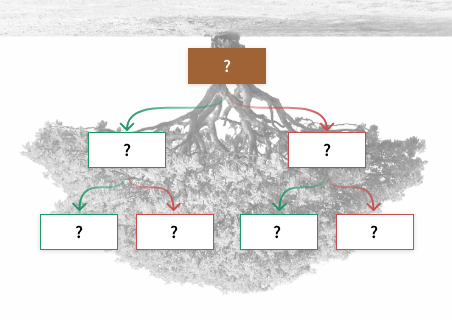

Before we begin the lesson, a couple of clarifications: although there are a few different algorithms used to create decision trees (ID3, C4.5, C5.0 and CART), this course will focus on how to build them by using the scikit-learn library, which uses the classification and **regression trees (CART)** algorithm.

When we say classification, we're referring to predicting a categorical label, which can be binary (e.g., positive/negative, on/off, true/false etc.) or a limited number of categories (e.g., colors, seasons, months, etc.), whereas regression refers to predicting numerical quantities (e.g., price, age, distance, etc.).

It's important that we first understand how scikit-learn is creating both classification and regression trees. Therefore, in this lesson, we will perform the **calculations manually using small datasets**.


#Trees Strucutres and Components

Below, we see a graphical representation of a typical decision tree for a classification problem. It's for a hypothetical situation wherein a person wants to see an **R-rated movie at a theater**.

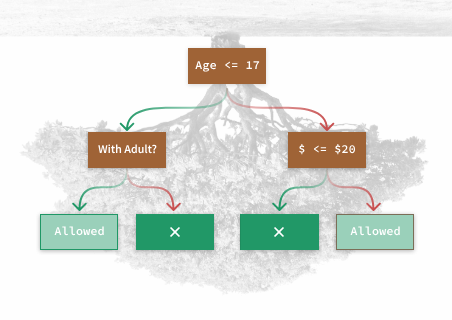

The goal of this tree is to answer the question, "Is this person allowed to enter the movie or not?" That will depend on a few conditions:

* Is the person underage or an adult?
* In the case of an underage person, are they with an adult?
* In the case of an adult, do they have enough money?

The diagram above contains the following elements:

* **Seven boxes**, featuring two colors: three brown and four green.
* The four green boxes have two shades: **two are darker** (the ones with an "X"), and the other** two are lighter** (the ones marked "Allowed").
* **Six arrows** with two different colors: green and red.

The brown boxes are **nodes**, and they always contain a **threshold** that will split the data into two distinct groups depending on whether the threshold evaluates to `True` or `False`.

Starting from the top, we have the **root node**, which is where the tree begins.

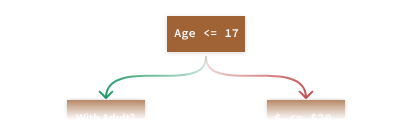

One level below this, we have the **internal nodes**:

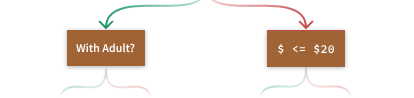

Internal nodes always have at least one node above them and always perform a split. Keep in mind that depending on the complexity of the dataset, there might be several levels containing internal nodes.

## Terminal Boxes

The last level, at the bottom, features the green boxes. These are **terminal nodes**, or more commonly, **leaf nodes** or just **leaves**. In order to be considered a leaf node, **the node cannot perform a split**. They're final, in the sense that they determine the outcome of our information — in this case, if the person is allowed to see the movie or not.

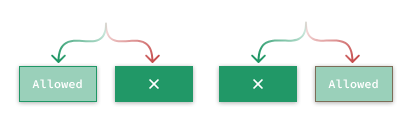

Keep in mind that we won't necessarily find all the leaves at the bottom of our tree. Sometimes they appear on upper levels, if the threshold condition is extremely predictive. However, any nodes we find on the bottom level will always be leaf nodes.

##Level of Hierarchy

In this example, we only have three levels of hierarchy:

* The first level is where the root node is
* The second level is where the internal nodes are
* The third level is where the leaves are

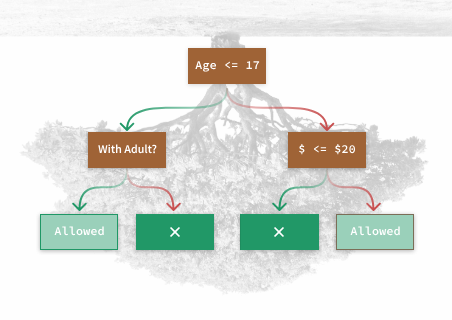

#Example

 We're using it here to determine if a person can enter a casino or not.

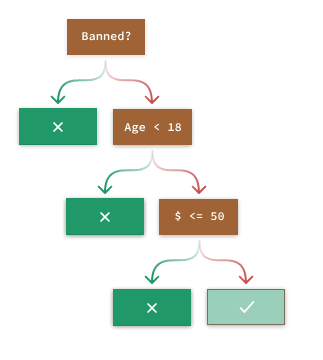

Tree Structure and Components (Part 2)

There is also an alternate, complementary classification for the nodes based on their relationship to each other: **parent** nodes are nodes that get divided into two subsequent nodes called **child** nodes. Therefore, we can conclude the following:

* **The root node** is exclusively a parent node because it always gets divided into subsequent nodes and does not originate from a previous node.
* **The internal nodes** are both parent and child nodes: they can be the parents of two nodes, two leaves, or a node and a leaf.
* **The leaves** are exclusively child nodes.

Now let's describe the arrows, called **branches**. The green ones represent the cases when the threshold's condition evaluates to True, and the red ones are when the condition evaluates to False. Note that there is a universal rule here: True conditions always go to the left, and False conditions always go to the right.

Always remember that with decision trees, **True = Left, False = Right.**

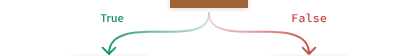

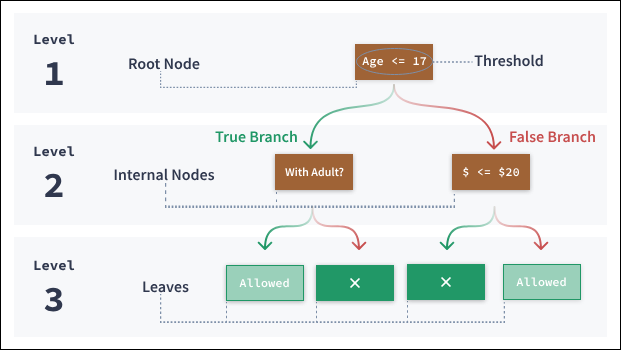



#How Thresholds Work

However, when using a dataset, you might be curious about how the splits will be decided if we use a decision tree. And the key here is the thresholds: each one will split the dataset in two, based on whether each observation meets the threshold condition or not. So, we will have a subset that includes all the observations that evaluate to `True`, and a second subset for all the observations that evaluate to `False`.

It's better to see this process in action, so let's consider the following ten observations from a dataset:

| age | banned | entrance |
|-----|--------|----------|
| 34  | no     | Allowed  |
| 14  | yes    | Denied   |
| 14  | no     | Denied   |
| 24  | yes    | Denied   |
| 24  | no     | Allowed  |
| 13  | no     | Denied   |
| 19  | no     | Allowed  |
| 34  | no     | Allowed  |
| 24  | no     | Allowed  |
| 34  | yes    | Denied   |

If, for our first split, we randomly choose a threshold, like `age <= 19`, then we would get the following child subset for all observations where `age <= 19 `evaluates to `True`:

| age | banned | entrance |
|-----|--------|----------|
| 14  | yes    | Denied   |
| 14  | no     | Denied   |
| 13  | no     | Denied   |
| 19  | no     | Allowed  |

 and this one for all the observations that evaluated to `False`:

 | age | banned | entrance |
|-----|--------|----------|
| 34  | no     | Allowed  |
| 24  | yes    | Denied   |
| 24  | no     | Allowed  |
| 34  | no     | Allowed  |
| 24  | no     | Allowed  |
| 34  | yes    | Denied   |


We can see that the threshold functions as an "if-else" statement: if `age` is less or equal to 19, it's `True`; else, it's `False`.

In a graphical representation of a decision tree, `age <= 19` would be the threshold of a parent node, and each split would be the resulting child nodes!

And the process repeats recursively: for every new subset, the algorithm will continue applying different thresholds until we reach a **pure leaf**.

* If we are facing a **classification problem**, a pure leaf is a terminal node that is only comprised of observations with the same class (in our example, either `Allowed` or `Denied`).

* If we're facing a **regression problem**, then the algorithm will continue until every single number from the target column has its own exclusive leaf.

Now we can see the ultimate goal of decision trees: they perform the splits that get the most homogeneous groups of observations. Once they get a totally **homogeneous group**, we reach a pure leaf, and the tree stops this recursive splitting process since it's pointless to continue splitting groups with completely similar observations.

Just remember: when we say homogeneous observations, we're referring to observations that share the same **value in the target column**!

## Generate splits in pandas

Before introducing the exercises, since we will be using the pandas library, it's more convenient to perform these splits using masks. Since these conditional expressions act as filters, the syntax is as follows:

    import pandas as pd

    true_split = df[df["feature_column"] <= threshold_value]

    false_split = df[ ~(df["feature_column"] <= threshold_value) ]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

parent = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/toy_df.csv")
print(parent)

#banned or not
child1_true = parent[parent["banned"] == True]

child1_false = parent[parent["banned"] == False]

#money or not
child2_true = child1_false[parent['money_in_pocket']<=50]
child2_false = child1_false[parent['money_in_pocket']>50]

   banned  money_in_pocket  adult entrance
0   False               65   True  Allowed
1   False               35   True   Denied
2   False               40  False   Denied
3   False               60  False   Denied
4    True               60   True   Denied
5    True               35   True   Denied
6   False               60   True  Allowed
7   False               60   True  Allowed
8   False               65   True  Allowed
9   False               40   True   Denied


<ipython-input-4-ea2082fc0b90>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  child2_true = child1_false[parent['money_in_pocket']<=50]
<ipython-input-4-ea2082fc0b90>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  child2_false = child1_false[parent['money_in_pocket']>50]


#How to get thresholds

However, after this, you may be thinking, "Are thresholds chosen randomly? Do we need to calculate thresholds by using every single number in an extensive range?"

On the one hand, if we start filtering the dataset by random thresholds, we **won't get the most homogeneous groups of observation**s, which is the objective of decision trees.

On the other hand, if we tried every single number to calculate thresholds, that would be extremely slow and computationally expensive

We need to examine every **feature column and determine a list of thresholds for each one**. At the same time, we **never calculate thresholds on the target column**.

Let's work through how we get the list of candidate thresholds from our ten observations:

| age | banned | entrance |
|-----|--------|----------|
| 34  | no     | Allowed  |
| 14  | yes    | Denied   |
| 14  | no     | Denied   |
| 24  | yes    | Denied   |
| 24  | no     | Allowed  |
| 13  | no     | Denied   |
| 19  | no     | Allowed  |
| 34  | no     | Allowed  |
| 24  | no     | Allowed  |
| 34  | yes    | Denied   |

Since the target column is `entrance`, we don't need to find thresholds for this column.


##Threshold for Age column


Instead, we focus on the two feature columns: `age` and `banned`. We start with the `age` column by sorting the observations, like so:

| age | banned |
|-----|--------|
| 13  | no     |
| 14  | yes    |
| 14  | no     |
| 19  | no     |
| 24  | yes    |
| 24  | no     |
| 24  | no     |
| 34  | no     |
| 34  | no     |
| 34  | yes    |

Then we remove any duplicates so that we are left with a list with unique values. Now we're left with the following:

    [13, 14, 19, 24, 34]

Next, we find the average of each pair of consecutive values to obtain the list of candidate thresholds.

So, we start with 13 and 14. We add them together, divide by 2, and we get our first candidate threshold: `13.5.`

We continue like this until we get the three remaining thresholds. Our final list of candidate thresholds for the age column is the following:

    [13.5, 16.5, 21.5, 29.0]

##Threshold for BANNED column

We're almost there! Now we just need to get the thresholds for the `banned` column. However, since scikit-learn only works with numeric values, and this whole process imitates the way scikit-learn chooses the thresholds, we can simply treat them as Boolean values, like so:

"yes" = TRUE = 1

"no" = FALSE = 0

When we do this, we end up with a single pair of values: 0 and 1. As before, we find their average to get a single threshold of `0.5` for the banned column:


In [ ]:
parent = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/toy_df.csv", usecols=["adult", "money_in_pocket"], nrows=5)
print(parent)

#binary category = threshold = 0.5
thresh_adult = 0.5

#Sort the unique values of the money_in_pocket column
money_pocket_unique = parent['money_in_pocket'].sort_values().unique().tolist()

#threshold candidates
thresh_money_pocket = []
for i in range(len(money_pocket_unique)-1):
    mean = (money_pocket_unique[i] + money_pocket_unique[i+1])/2
    thresh_money_pocket.append(mean)

answer = len(thresh_money_pocket)+1

   money_in_pocket  adult
0               65   True
1               35   True
2               40  False
3               60  False
4               60   True


# How to Get the Optimal Threshold

Great job so far! You've learned how to get all the candidate thresholds for every feature column. However, you're probably thinking, *Okay, so we have this list of candidate thresholds, but how do we know which one is the best one to use for the split? After all, we have to choose only one for each split, right?"*

We'll learn about four different criteria that we can use to choose an optimal threshold from a list of candidate thresholds.

*For Regression Trees*:

* **Mean Squared Error (MSE)**
* **Mean Absolute Error (MAE)**

*For Classification Trees*:

* **Gini Impurity**
* **Entropy & Information Gain**

**There is a quintessential rule to remember here:** no matter which criterion we choose to implement, it only applies to observations in the **target column** but never to a feature column! This may seem counterintuitive since thresholds apply to feature columns. However, we assess the effectiveness of each candidate threshold to separate observations into more homogeneous groups by comparing their results. These criteria allow us to measure that effectiveness numerically.

# Regression Trees: Mean Squared Error (MSE)

Considering that regression problems can often involve thousands or even millions of numerical observations, we can't simply treat every single one of those numbers as a category. We need to find a way to aggregate them.

In the case of MSE, we begin this summarization process by comparing each value in the target column with the mean of the target column. These are the steps performed by MSE:

1. It calculates the mean value of the target column.

1. Next, it calculates the **squared** difference between **each value** in the target column and the **mean** of the target column. This difference is the **Error**.

1. Finally, it sums all these squared Errors and divides them by the total number of observations to give the mean of the squared errors.

The formula for calculating the MSE is as follows:

$\displaystyle\text{MSE} = \frac 1 n \sum\limits_{i=1}^{n} (x_i - \bar{x})^2$

Where:

* n is the total number of observations
* x_i are the individual values in the target column

* x_bar is the mean value of the target column

Now that we have seen the MSE criterion in action, we need to apply it to every threshold in the list of candidates for the split to determine the optimal threshold to use. For each candidate threshold we do the following:

1. Get the MSE for the subset of observations that evaluated to `True`.

1. Get the MSE for the subset of observations that evaluated to `False`.

1. Sum both of these values to get the total MSE for that threshold.

Once we get the MSE for every candidate threshold, we will choose the one with the lowest MSE. That one will be our optimal threshold.

Since the purpose of the criteria is to assess how well each candidate threshold splits the target column into more homogeneous groups of observations, **we apply the MSE (and the other three criteria) exclusively to the target column, never to feature columns.**


In [ ]:
import numpy as np

toy_salaries = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/toy_casino_salary.csv")
print(toy_salaries)

#feature column : worked_hours
#target: salary

thresh28_true = toy_salaries[toy_salaries['worked_hours']<=28]

thresh28_false = toy_salaries[toy_salaries['worked_hours']>28]

#Calculate the MSE for both subsets - applied in target column
thresh28_true_mse = sum((thresh28_true['salary'] - np.mean(thresh28_true['salary']))**2)/len(thresh28_true)

thresh28_false_mse = sum((thresh28_false['salary'] - np.mean(thresh28_false['salary']))**2)/len(thresh28_false)

#sum both mses
thresh28_mse = thresh28_true_mse + thresh28_false_mse
#################################################

thresh37_true = toy_salaries[toy_salaries['worked_hours']<=37.5]

thresh37_false = toy_salaries[toy_salaries['worked_hours']>37.5]

thresh37_true_mse = sum((thresh37_true['salary'] - np.mean(thresh37_true['salary']))**2)/len(thresh37_true)

thresh37_false_mse = sum((thresh37_false['salary'] - np.mean(thresh37_false['salary']))**2)/len(thresh37_false)

#sum both mses
thresh37_mse = thresh37_true_mse + thresh37_false_mse

answer = 37.5

   worked_hours  salary
0            26     598
1            30     690
2            48    1104
3            45    1035
4            62    1426


# Regression Trees: Mean Absolute Error (MAE)

Now let's look at the second criterion we can use for our regression trees to determine the optimal threshold.

The **mean absolute error (MAE) **is similar to MSE, except for the following key differences:

* Instead of using the mean to calculate the error, we use the **median**. This choice is made because MAE focuses on the average absolute error of predictions, without implying that the predictions themselves are made using the mean.

* Instead of using squared differences to calculate the error, we use the **absolute difference** between each observation and the **median**.

The formula for calculating the MAE is as follows:

$\displaystyle\text{MAE} = \frac{1}{n} \sum\limits_{i=1}^{n} |x_i - \tilde{x}|$

Where:

 **n** is the number of observations

 **x_i** are the individual values in the target column

**x_bar** is the median value of the target column

These are the steps performed by the MAE criterion:

1. It takes all the observations in the dataset or subset and **calculates the median value** of the target column.

1. Next, it calculates the **absolute difference** between each value in the target column and the median of the target column. This difference is called the error.

1. Finally, the MAE **sums all these absolute errors and divides them by the total number of observations** to give the mean of the absolute errors. This is why the criterion is called the mean absolute error instead of the median absolute error.

Now that we have seen the MAE criterion in action, we need to apply it to every threshold in the list of candidates for the split to determine the optimal threshold to use. The process is similar to the one for MSE, so for each candidate threshold, we do the following:

1) Get the MAE for the subset of observations that evaluated to `True`.

2) Get the MAE for the subset of observations that evaluated to `False`.

3) `Sum` both of these values to get the total MAE for that threshold.

Once we get the MAE for every candidate threshold, we will **choose the one with the lowest MAE**. That one will be our optimal threshold.

In [ ]:
import numpy as np

toy_salaries = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/toy_casino_salary.csv")
print(toy_salaries)

#feature column : worked_hours
#target: salary

thresh28_true = toy_salaries[toy_salaries['worked_hours']<=28]

thresh28_false = toy_salaries[toy_salaries['worked_hours']>28]

#Calculate the MAE for both subsets - applied in target column
thresh28_true_median = thresh28_true['salary'].median()
thresh28_false_median = thresh28_false['salary'].median()

thresh28_true_mae = sum(abs(thresh28_true['salary'] -thresh28_true_median))/len(thresh28_true)

thresh28_false_mae = sum(abs(thresh28_false['salary'] - thresh28_false_median))/len(thresh28_false)

#sum both mses
thresh28_mae = thresh28_true_mae + thresh28_false_mae
#################################################

thresh37_true = toy_salaries[toy_salaries['worked_hours']<=37.5]

thresh37_false = toy_salaries[toy_salaries['worked_hours']>37.5]

thresh37_true_median = thresh37_true['salary'].median()
thresh37_false_median = thresh37_false['salary'].median()


thresh37_true_mae = sum(abs(thresh37_true['salary'] -
thresh37_true_median))/len(thresh37_true)

thresh37_false_mae = sum(abs(thresh37_false['salary'] - thresh37_false_median))/len(thresh37_false)

#sum both mses
thresh37_mae = thresh37_true_mae + thresh37_false_mae

answer = 37.5

   worked_hours  salary
0            26     598
1            30     690
2            48    1104
3            45    1035
4            62    1426


# Classification Trees: Gini Impurity

Let's get started with Gini impurity. This criterion measures the probability of misclassifying the label in the target column of a certain observation if we randomly select that observation from the dataset.

The formula for calculating Gini impurity is as follows:

$\displaystyle\text{Gini} = 1 - \sum\limits_{i=1}^{k}(p_i)^2$

Where:

**k** is the number of distinct classes in the target column

**p_i** is the probability an observation belongs to class *i*

The optimal score for Gini impurity is 0 (total certainty of correctly labeling the observation), and the worst one is 1 (although we will never reach that value, as it would require an infinite number of observations). Therefore, the lower the Gini impurity, the more homogeneous our group of observations will be.

We can also express the gini impurity formula as follows:

$\displaystyle\text{Gini} = 1 - \left[\left(\frac{\text{number of observations of class }1}{\text{total number of observations}}\right)^2 + \ldots + \left(\frac{\text{number of observations of class }k}{\text{total number of observations}}\right)^2\right]$

##Gini Example

We will apply Gini to some specific examples, as we did with the previous criteria.

Let's start with a dataset whose target column contains the same movie genre for all 10 observations, so we have total certainty that we will always choose a correctly labeled observation. This is how our calculation would look:

$\displaystyle\text{Gini} = 1 - \left(\frac{10}{10} \right)^2 = 0$

Total certainty equals 0 in Gini, as we said.

What about another dataset, where we have a perfectly balanced target column with **10 action movies and 10 horror movies**?

$\displaystyle\text{Gini} = 1 - \left[\left(\frac{10}{20}\right)^2 + \left(\frac{10}{20}\right)^2 \right] = 0.5$

As expected, since it's balanced, we have a 50% chance of misclassifying the movie.

But what if we have more than two genres? What if we have **5 dramas, 5 horror movies, 5 comedies, and 5 documentaries**?

$\displaystyle\text{Gini} = 1 - \left[\left(\frac{5}{20}\right)^2 + \left(\frac{5}{20}\right)^2 + \left(\frac{5}{20}\right)^2 + \left(\frac{5}{20}\right)^2\right] = 0.75$




##Gini Implementation

Now that we have seen the Gini criterion in action, we need to apply it to every threshold in the list of candidates for the split. In each instance we do the following:

1) Get the number of observations of the parent dataset using the .`shape[0]` attribute. - `parent.shape[0]`

2) Get the Gini and `.shape[0]` for the subset where the observations evaluated to `True`. - `Gini_true_child`

3) Get the Gini and `.shape[0]` for the subset where the observations evaluated to `False`. - `Gini_false_child`

4) Get the weighted Gini. Given that on every split we can potentially have different numbers of observations, we need to equalize them in order to get a balanced Gini. Here is how we calculate the weighted Gini:

$\displaystyle\text{Weighted Gini =} \left(\frac{\text{true_split.shape[0]}}{\text{parent.shape[0]}} \times \text{Gini}_\text{true child}\right) + \left(\frac{\text{false_split.shape[0]}}{\text{parent.shape[0]}} \times \text{Gini}_\text{false child}\right)$

Notice that $\displaystyle\frac{\text{child_split.shape[0]}}{\text{parent.shape[0]}}$  is how we weight the Gini Impurities due to every split potentially having different numbers of observations.

So, once we get the weighted Gini for each candidate threshold, we will choose the one with the lowest weighted Gini. That one will be our optimal threshold.

Similar to the other criteria, we apply Gini exclusively to the target column, never to feature columns!

In [ ]:
toy_entrance = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/toy_df.csv", usecols=["money_in_pocket", "entrance"]).sample(5, random_state=24)
print(toy_entrance)

#features = money_in_pocket
#target = entrance

#Calculate the Gini of the toy_entrance dataset
parent_gini = 1 - ( (2/5)**2 + (3/5)**2)
parent_shape = toy_entrance['entrance'].shape[0]

#split dataset by threshhold 37.5
thresh37_true = toy_entrance[toy_entrance['money_in_pocket']<=37.5]

thresh37_false = toy_entrance[toy_entrance['money_in_pocket']>37.5]

#Calculate gini for subsets
thresh37_true_gini = 1 - (1/1)**2
thresh37_false_gini = 1 - ((2/4)**2 + (2/4)**2)

#Calculate the weighted Gini for this threshold 37.5
thresh37_gini = (thresh37_true.shape[0]/parent_shape)*thresh37_true_gini + (thresh37_false.shape[0]/parent_shape)*thresh37_false_gini

#repeat the process with threshold <=50

#split dataset by threshhold 37.5
thresh50_true = toy_entrance[toy_entrance['money_in_pocket']<=50]

thresh50_false = toy_entrance[toy_entrance['money_in_pocket']>50]

#Calculate gini for subsets
thresh50_true_gini = 1 - (1/1)**2
thresh50_false_gini = 1 - ((1/3)**2 + (2/3)**2)

#Calculate the weighted Gini for this threshold 37.5
thresh50_gini = (thresh50_true.shape[0]/parent_shape)*thresh50_true_gini + (thresh50_false.shape[0]/parent_shape)*thresh50_false_gini

answer = 50



   money_in_pocket entrance
9               40   Denied
4               60   Denied
8               65  Allowed
7               60  Allowed
5               35   Denied


# Classification Trees: Entropy and Information Gain

On this screen, we'll focus on the entropy criterion and the information gain. Consider that out of the four criteria, entropy can be the most difficult to grasp.

**Entropy** is a term with many definitions; you may be familiar with its classic definition used in physics. However, here, we are using the definition from information theory, which is about the level of uncertainty or disorder that exists among the observations of a target column; in other words, how *heterogeneous the group of observations is!*

If we then remember that decision trees aim to create **homogeneous groups** of observations, as a consequence, they will try to reduce entropy during their splits in a process called information gain. So the more information gain, the better!

The formula for calculating the Entropy is as follows:

$\displaystyle\text{Entropy} = - \sum\limits_{i=1}^{k}(p_i)\times\log_{2}(p_i)$

Let's look closely at the five important components of this formula:

1. **log:** much like addition and subtraction are inverse operations, so are logarithms and exponents. Recall that a logarithm returns an exponent value : $\log_{10}(10)^3 = 3$

1. **log base:** in the case of the entropy criterion for the CART algorithm, the base will always be 2, so one less thing to worry about! Remember that, in Python, we import the log function from the math module and specify base 2 like so: `log([your value], 2).`

1. **p_i:** represents the probability of selecting a specific class from a group of observations. It is calculated as follows:

  $\displaystyle p_i = \frac{\text{number of observations of that class}}{\text{total number of observations}}$

  So, for example, in a group of 10 homogeneous observations, the entropy would be:

  $\displaystyle\text{Entropy} = -\left[\frac{10}{10}\times\log_2\left(\frac{10}{10}\right)\right] = 0$

  Since there is no disorder here, and the predictability is absolute, we get 0 entropy.

  Notice that if **p_i** is 0, $\log_{2}(p_i)$ is undefined since there is no x such that $2^x=0$ By convention, in these situations, $(p_i) \times \log_{2}(p_i) = 0$

1. The ∑ symbol tells us that we need to repeat the calculation for every class present in our target column and sum the values to get the total entropy. Since k is the number of distinct classes in the target column, this calculation will be performed k times.

  Suppose we have a target column with two distinct classes (e.g., 10 dramas and 10 comedies). We need to repeat the above calculation twice — once for each class of movie:

  $\displaystyle\text{Entropy} = -\left[\frac{10}{20}\times\log_2\left(\frac{10}{20}\right) + \frac{10}{20}\times\log_2\left(\frac{10}{20}\right)\right] = 1$

  Since we have complete unpredictability here (there is a 50% chance of a randomly selected observation is correctly labeled), we get the maximum entropy for a binary target column: 1.

  The maximum value for entropy depends on the number of classes we have:

  * 2 Classes: Maximum Entropy = 1
  * 4 Classes: Maximum Entropy = 2
  * 8 Classes: Maximum Entropy = 3
  . . . and so on.

1. Lastly, the - sign at the very beginning of the formula ensures that entropy is always positive.

To summarize, the formula can be written as follows:

$\displaystyle\text{Entropy} = - \left[\frac{\text{number observations class 1}}{\text{total number observations}}\times\log_2\left(\frac{\text{number observations class 1}}{\text{total number observations}}\right) + \ldots \\ \; \; \; \; \; \; \; \; \; \; \; \; \; \; \ldots + \frac{\text{number observations class }k}{\text{total number observations}}\times\log_2\left(\frac{\text{number observations class }k}{\text{total number observations}}\right)\right]$

## Applying Entropy with Threshold

Now that we have seen how the entropy value is calculated, we need to apply it to every threshold in the list of candidates for the split. The process is pretty similar to the one from the previous screen, so in each instance, we do the following:

1) Get the number of observations of the parent dataset using the `.shape[0]` attribute.

2) Get the entropy and `.shape[0]` for the subset of observations that evaluated to `True`.

3) Get the entropy and `.shape[0]` for the subset of observations that evaluated to `False`.

4) Get the **information gain**, which is the difference between the **entropy from the parent node** and **the weighted entropies** from both child nodes.

The formula for calculating information gain is as follows

$\displaystyle\text{IG} = \text{Entropy}_\text{parent} - \left(\frac{\text{true_split.shape[0]}}{\text{parent.shape[0]}} \times \text{Entropy}_\text{true child} + \frac{\text{false_split.shape[0]}}{\text{parent.shape[0]}} \times \text{Entropy}_\text{false child}\right)$


Remember that $\displaystyle \frac{\text{child_split.shape[0]}}{\text{parent.shape[0]}}$ is how we weight the entropies due to every split potentially having different numbers of observations.

So, once we get the information gain for each candidate threshold, we will choose the one with the highest information gain. That one will be our optimal threshold.

Similar to the other criteria, we apply entropy and information gain exclusively to the target column, never to feature columns!

As you can see, this process will inevitably become very repetitive and error-prone if we perform it manually.


In [ ]:
# Import math Library
from math import log

toy_entrance = pd.read_csv("toy_df.csv", usecols=["money_in_pocket", "entrance"]).sample(5, random_state=24)
print(toy_entrance)

#target entrance
parent_entropy = - ((2/5)*log(2/5,2) + (3/5)*log(3/5,2))
parent_shape = toy_entrance['entrance'].shape[0]

#split dataset by threshold 50
thresh50_true = toy_entrance[toy_entrance['money_in_pocket']<=50]

thresh50_false = toy_entrance[toy_entrance['money_in_pocket']>50]

#calculate entropy for each subset
thresh50_true_entropy = - ((2/2)*log(2/2,2)) #1 classes for 2 elements

thresh50_false_entropy = - ((1/3)*log(1/3,2) + (2/3)*log(2/3,2)) #2 classes for 3 elements

#Information gaing for 50
thresh50_info_gain = parent_entropy - ((thresh50_true.shape[0]/parent_shape)*thresh50_true_entropy + (thresh50_false.shape[0]/parent_shape)*thresh50_false_entropy)

#split dataset by threshold 62.5
thresh62_true = toy_entrance[toy_entrance['money_in_pocket']<=62.5]

thresh62_false = toy_entrance[toy_entrance['money_in_pocket']>62.5]

#calculate entropy for each subset
thresh62_true_entropy = - ((3/4)*log(3/4,2) + (1/4)*log(1/4,2)) #2 classes for 4 elements

thresh62_false_entropy = - (1/1)*log(1/1,2) #1 classes for 1 elements

#Information gaing for 62.5
thresh62_info_gain = parent_entropy - ((thresh62_true.shape[0]/parent_shape)*thresh62_true_entropy + (thresh62_false.shape[0]/parent_shape)*thresh62_false_entropy)

answer = 50

